# Simulation study

In [1]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.base import clone
from doubleml import DoubleMLData
from doubleml.double_ml_selection import DoubleMLSSM

from sklearn.linear_model import LassoCV, LogisticRegressionCV
from doubleml.double_ml_data import DoubleMLData
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt

from doubleml.datasets import make_ssm_data

In [4]:
def simulate_data(n, p):
    s = 2  # number of covariates that are confounders
    sigma = np.array([[1, 0.5], [0.5, 1]])
    e = np.random.multivariate_normal(mean=[0, 0], cov=sigma, size=n).T
    X = np.random.randn(n, p)  # covariate matrix
    beta = np.hstack((np.repeat(0.25, s), np.repeat(0, p - s)))  # Coefficients determining the degree of confounding
    d = np.where(np.dot(X, beta) + np.random.randn(n) > 0, 1, 0)  # Treatment equation
    z = np.random.randn(n)
    s = np.where(np.dot(X, beta) + 0.25 * d + z + e[0] > 0, 1, 0)  # Selection equation
    y = np.dot(X, beta) + 0.5 * d + e[1]  # Outcome equation
    y[s == 0] = 0

    return X, y, d, s, z


def get_coefs(n, p, score, learner, learner_class):
    X, y, d, s, z = simulate_data(n, p)

    if score == 'mar':
        simul_data = DoubleMLData.from_arrays(X, y, d, z=None, t=s)
    else:
        simul_data = DoubleMLData.from_arrays(X, y, d, z=z, t=s)

    ml_mu_sim = clone(learner)
    ml_pi_sim = clone(learner_class)
    ml_p_sim = clone(learner_class)

    obj_dml_sim = DoubleMLSSM(simul_data, ml_mu_sim, ml_pi_sim, ml_p_sim, score=score)
    obj_dml_sim.fit()

    return obj_dml_sim.all_coef[0][0]


### Missingness at random (MAR)

In [5]:
X, y, d, s, z = simulate_data(2000, 100)
simul_data = DoubleMLData.from_arrays(X, y, d, z=None, t=s)

learner = LassoCV()
learner_class = RandomForestClassifier()
ml_mu_sim = clone(learner)
ml_pi_sim = clone(learner_class)
ml_p_sim = clone(learner_class)

obj_dml_sim = DoubleMLSSM(simul_data, ml_mu_sim, ml_pi_sim, ml_p_sim, score='mar')
obj_dml_sim.fit()
print(obj_dml_sim)

================== DoubleMLSSM Object ==================

------------------ Data summary      ------------------
Outcome variable: y
Treatment variable(s): ['d']
Covariates: ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41', 'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51', 'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61', 'X62', 'X63', 'X64', 'X65', 'X66', 'X67', 'X68', 'X69', 'X70', 'X71', 'X72', 'X73', 'X74', 'X75', 'X76', 'X77', 'X78', 'X79', 'X80', 'X81', 'X82', 'X83', 'X84', 'X85', 'X86', 'X87', 'X88', 'X89', 'X90', 'X91', 'X92', 'X93', 'X94', 'X95', 'X96', 'X97', 'X98', 'X99', 'X100']
Instrument variable(s): None
Time variable: t
No. Observations: 2000

------------------ Score & algorithm ------------------
Score 

### Nonignorable nonresponse

In [6]:
simul_data = DoubleMLData.from_arrays(X, y, d, z=z, t=s)

learner = LassoCV()
learner_class = RandomForestClassifier()
ml_mu_sim = clone(learner)
ml_pi_sim = clone(learner_class)
ml_p_sim = clone(learner_class)

obj_dml_sim = DoubleMLSSM(simul_data, ml_mu_sim, ml_pi_sim, ml_p_sim, score='nonignorable')
obj_dml_sim.fit()
print(obj_dml_sim)

================== DoubleMLSSM Object ==================

------------------ Data summary      ------------------
Outcome variable: y
Treatment variable(s): ['d']
Covariates: ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41', 'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51', 'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61', 'X62', 'X63', 'X64', 'X65', 'X66', 'X67', 'X68', 'X69', 'X70', 'X71', 'X72', 'X73', 'X74', 'X75', 'X76', 'X77', 'X78', 'X79', 'X80', 'X81', 'X82', 'X83', 'X84', 'X85', 'X86', 'X87', 'X88', 'X89', 'X90', 'X91', 'X92', 'X93', 'X94', 'X95', 'X96', 'X97', 'X98', 'X99', 'X100']
Instrument variable(s): ['z']
Time variable: t
No. Observations: 2000

------------------ Score & algorithm ------------------
Score

### Multiple simulations

100%|██████████| 1000/1000 [39:26<00:00,  2.37s/it]

Average ATE estimate:  0.5084606008383383
Median ATE estimate:  0.5090989223793609
Standard deviation of ATE estimate:  0.06530520319865513


<AxesSubplot: xlabel='ATE estimate', ylabel='Count'>

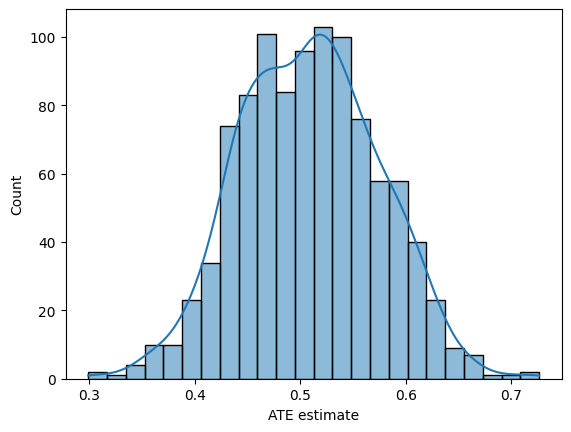

In [9]:
learner = LassoCV()
learner_class = LogisticRegressionCV()
params = []

for i in tqdm(range(1000)):
    params.append(get_coefs(2000, 100, 'mar', learner, learner_class))

print("Average ATE estimate: ", np.mean(params))
print("Median ATE estimate: ", np.median(params))
print("Standard deviation of ATE estimate: ", np.std(params))
plt.xlabel('ATE estimate')
sns.histplot(params, kde=True)

In [ ]:
for i in tqdm(range(1000)):
    params.append(get_coefs(2000, 100, 'nonignorable', learner, learner_class))

print("Average ATE estimate: ", np.mean(params))
print("Median ATE estimate: ", np.median(params))
print("Standard deviation of ATE estimate: ", np.std(params))
plt.xlabel('ATE estimate')
sns.histplot(params, kde=True)

In [2]:
from doubleml.datasets import make_ssm_data
dml_data = make_ssm_data(mar=False)

In [3]:
learner = LassoCV()
learner_class = RandomForestClassifier()
ml_mu_sim = clone(learner)
ml_pi_sim = clone(learner_class)
ml_p_sim = clone(learner_class)

obj_dml_sim = DoubleMLSSM(dml_data, ml_mu_sim, ml_pi_sim, ml_p_sim, score='mar')
obj_dml_sim.fit()
print(obj_dml_sim)

/media/myska/7C0C98290C97DC88/Skola/bp/doubleml-for-py/doubleml/double_ml_selection.py:208: UserWarning: Incompatible data. z have been set as instrumental variable(s). You are estimating the effect under the assumption of data missing at random.                              Instrumental variables will not be used in estimation.
  warnings.warn('Incompatible data. ' +


================== DoubleMLSSM Object ==================

------------------ Data summary      ------------------
Outcome variable: y
Treatment variable(s): ['d']
Covariates: ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41', 'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51', 'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61', 'X62', 'X63', 'X64', 'X65', 'X66', 'X67', 'X68', 'X69', 'X70', 'X71', 'X72', 'X73', 'X74', 'X75', 'X76', 'X77', 'X78', 'X79', 'X80', 'X81', 'X82', 'X83', 'X84', 'X85', 'X86', 'X87', 'X88', 'X89', 'X90', 'X91', 'X92', 'X93', 'X94', 'X95', 'X96', 'X97', 'X98', 'X99', 'X100']
Instrument variable(s): ['z']
Time variable: s
No. Observations: 8000

------------------ Score & algorithm ------------------
Score